In [1]:
from stereo3d import stereo_read_from_pickle as std_read
from parsivel import pars_read_from_pickle as pars_read
from matplotlib import pyplot as plt
import numpy as np 
from pathlib import Path
pars_folder = Path("/home/marcio/stage_project/data/saved_events/pars_events")
stereo_folder = Path("/home/marcio/stage_project/data/saved_events/stereo_events")

# Read all the saved events from parsivel and stereo 3d

In [2]:
# Read the main parsivel series
parsivel_events = [pars_read(file_path) for file_path in pars_folder.iterdir()]
stereo_events = [std_read(file_path).convert_to_parsivel().filter_by_parsivel_resolution() for file_path in stereo_folder.iterdir()]
len(parsivel_events), len(stereo_events)

(31, 31)

Filter for outliers

In [3]:
outliers = [i for i, (pars_event, stereo_event) in enumerate(zip(parsivel_events, stereo_events)) if pars_event.total_depth_for_event > 10000 or stereo_event.total_depth_for_event > 10000]
for i, idx in enumerate(outliers):
    parsivel_events.pop(idx - i)
    stereo_events.pop(idx - i)
outliers

[]

### Plot the rains rate for both devices

In [4]:
def plot_identety(ax):
    maximum_value = max(max(ax.get_xbound()), max(ax.get_ybound()))
    ax.plot((0, maximum_value), (0, maximum_value))
    # ax.set_ybound((0, maximum_value))
    # ax.set_xbound((0, maximum_value))
dotstyle = {"s": 18.0, "c": "red", "marker":"."}

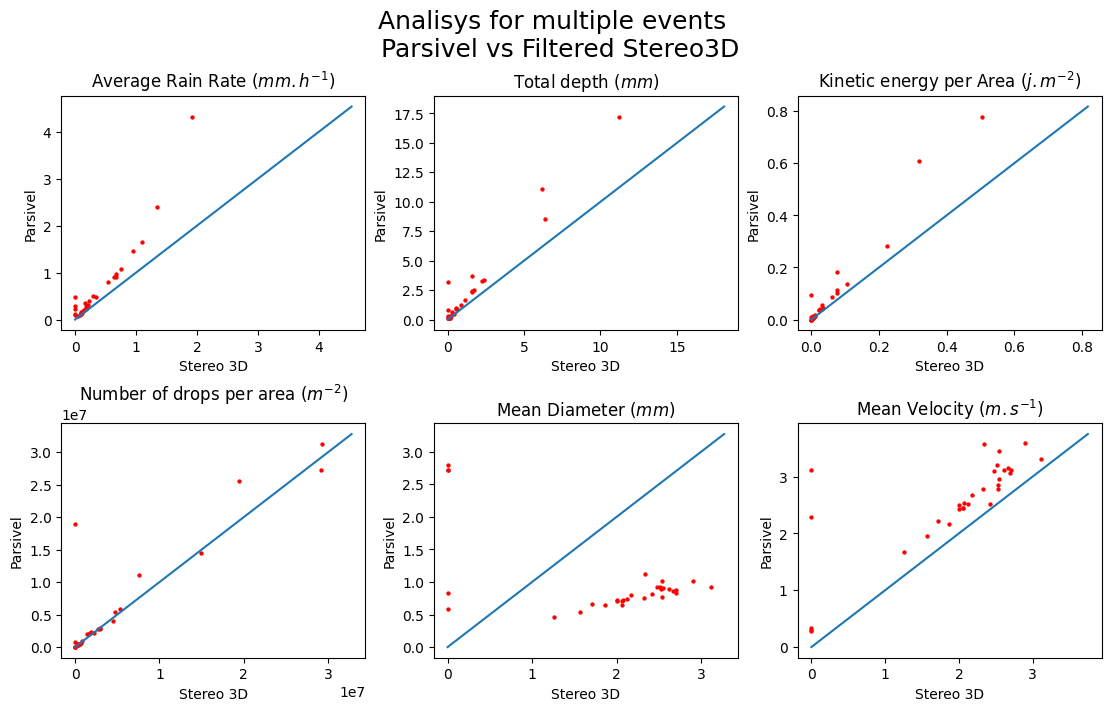

In [6]:
ncols = 3
nrows = 2
figure = plt.figure()
figure.set_size_inches((ncols*3 + 2, nrows*3 + 1))
figure.set_constrained_layout(True)
figure.suptitle("Analisys for multiple events \n Parsivel vs Filtered Stereo3D", fontsize=18)
plot_idx = 1

# Plot the rain rate
ax = figure.add_subplot(nrows,ncols, plot_idx)
ax.set_title("Average Rain Rate $(mm.h^{-1})$")
ax.set_ylabel("Parsivel")
ax.set_xlabel("Stereo 3D")
pars_values =[np.mean(event.rain_rate) for event in parsivel_events] 
stereo_values =[np.mean(event.rain_rate) for event in stereo_events]
ax.scatter(stereo_values,pars_values, **dotstyle)
plot_identety(ax)
plot_idx += 1

# Plot the total rain depth
ax = figure.add_subplot(nrows,ncols, plot_idx)
ax.set_title("Total depth $(mm)$")
ax.set_ylabel("Parsivel")
ax.set_xlabel("Stereo 3D")
pars_values =[event.total_depth_for_event for event in parsivel_events] 
stereo_values =[event.total_depth_for_event for event in stereo_events]
ax.scatter(stereo_values,pars_values, **dotstyle)
plot_identety(ax)
plot_idx += 1

# Plot the Kinecti energy per Area
ax = figure.add_subplot(nrows,ncols, plot_idx)
ax.set_title("Kinetic energy per Area $(j.m^{-2})$")
ax.set_ylabel("Parsivel")
ax.set_xlabel("Stereo 3D")
pars_values =[event.kinetic_energy_flow_for_event for event in parsivel_events] 
stereo_values =[event.kinetic_energy_flow_for_event for event in stereo_events]
ax.scatter(stereo_values,pars_values, **dotstyle)
plot_identety(ax)
plot_idx += 1

# Plot the mean diameter
ax = figure.add_subplot(nrows,ncols, plot_idx)
ax.set_title("Number of drops per area $(m^{-2})$")
ax.set_ylabel("Parsivel")
ax.set_xlabel("Stereo 3D")
pars_values =[event.npa_for_event for event in parsivel_events] 
stereo_values =[event.npa_for_event for event in stereo_events]
ax.scatter(stereo_values,pars_values, **dotstyle)
plot_identety(ax)
plot_idx += 1

# Plot the mean diameter
ax = figure.add_subplot(nrows,ncols, plot_idx)
ax.set_title("Mean Diameter $(mm)$")
ax.set_ylabel("Parsivel")
ax.set_xlabel("Stereo 3D")
pars_values =[event.mean_diameter_for_event for event in parsivel_events] 
stereo_values =[event.mean_velocity_for_event for event in stereo_events]
ax.scatter(stereo_values,pars_values, **dotstyle)
plot_identety(ax)
plot_idx += 1

# Plot the mean velocity
ax = figure.add_subplot(nrows,ncols, plot_idx)
ax.set_title("Mean Velocity $(m.s^{-1})$")
ax.set_ylabel("Parsivel")
ax.set_xlabel("Stereo 3D")
pars_values =[event.mean_velocity_for_event for event in parsivel_events] 
stereo_values =[event.mean_velocity_for_event for event in stereo_events]
ax.scatter(stereo_values,pars_values, **dotstyle)
plot_identety(ax)
plot_idx += 1